In [14]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [19]:
# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0, M0 = 1, 0, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0 - M0

In [20]:
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1.0/10 

mu = 1.0/50


# A grid of time points (in days)
t = np.linspace(0, 160, 160)

In [21]:
def sird_model(y, x, beta, gamma, mu):
    dS = -beta * y[0] * y[1] / N 
    dR = gamma * y[1]
    dM = mu * y[1]
    dI = -(dS + dR + dM)
    return dS, dI, dR, dM

In [23]:
# Initial conditions vector
y0 = S0, I0, R0, M0
# Integrate the SIR equations over the time grid, t.
ret = odeint(sird_model, y0, t, args=(beta, gamma, mu))
S, I, R, M = ret.T

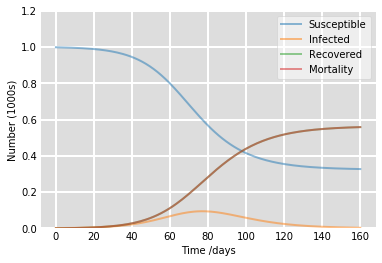

In [25]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)


ax.plot(t, S/1000, alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, alpha=0.5, lw=2, label='Recovered')
ax.plot(t, R/1000, alpha=0.5, lw=2, label='Mortality')



ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [36]:
alpha = 0.4

np.savetxt("i.csv", (I*alpha).astype('int'), delimiter=",")

In [37]:
np.savetxt("m.csv", M.astype('int'), delimiter=",")

In [38]:
beta, gamma, mu

(0.2, 0.1, 0.02)